In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

C:\Users\rashi\anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\rashi\anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Data Preprocessing:

-  successfully replaced categorical values with numerical ones and removed unknown categories. Ensure these changes are consistently applied.
Exploratory Data Analysis (EDA):

-   EDA includes visualizations with seaborn. To save and display the plots correctly, ensure plt.show() is called before plt.savefig("count_plot").
Feature Engineering:

-   Consider adding more feature engineering steps if relevant, such as interaction terms or aggregating data.

## Model Evaluation:

-  The classification report indicates an imbalance in your precision and recall for the positive class (1). This might be due to class imbalance in the dataset. You might want to try techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes.
-  Additionally, it’s beneficial to evaluate other metrics like ROC-AUC, precision-recall curve, etc.

## Modeling:

-  Ensure your train-test split is correctly implemented and cross-validation is used to prevent overfitting.


In [2]:
data=pd.read_csv("bank.csv")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
data[data["deposit"]=="no"]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5289,57,retired,single,primary,no,604,no,no,cellular,19,nov,187,1,-1,0,unknown,no
5290,45,admin.,divorced,secondary,no,0,yes,no,cellular,17,nov,102,1,-1,0,unknown,no
5291,48,blue-collar,married,secondary,no,238,yes,yes,cellular,2,jun,118,2,81,1,success,no
5292,34,admin.,single,secondary,no,673,yes,no,cellular,29,jan,89,1,260,2,failure,no
5293,37,entrepreneur,married,tertiary,no,7944,no,no,cellular,21,nov,102,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [5]:
data["loan"].replace({"no":0,"yes":1},inplace=True)
data["default"].replace({"no":0,"yes":1},inplace=True)
data["housing"].replace({"no":0,"yes":1},inplace=True)
data["deposit"].replace({"no":0,"yes":1},inplace=True)

In [6]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


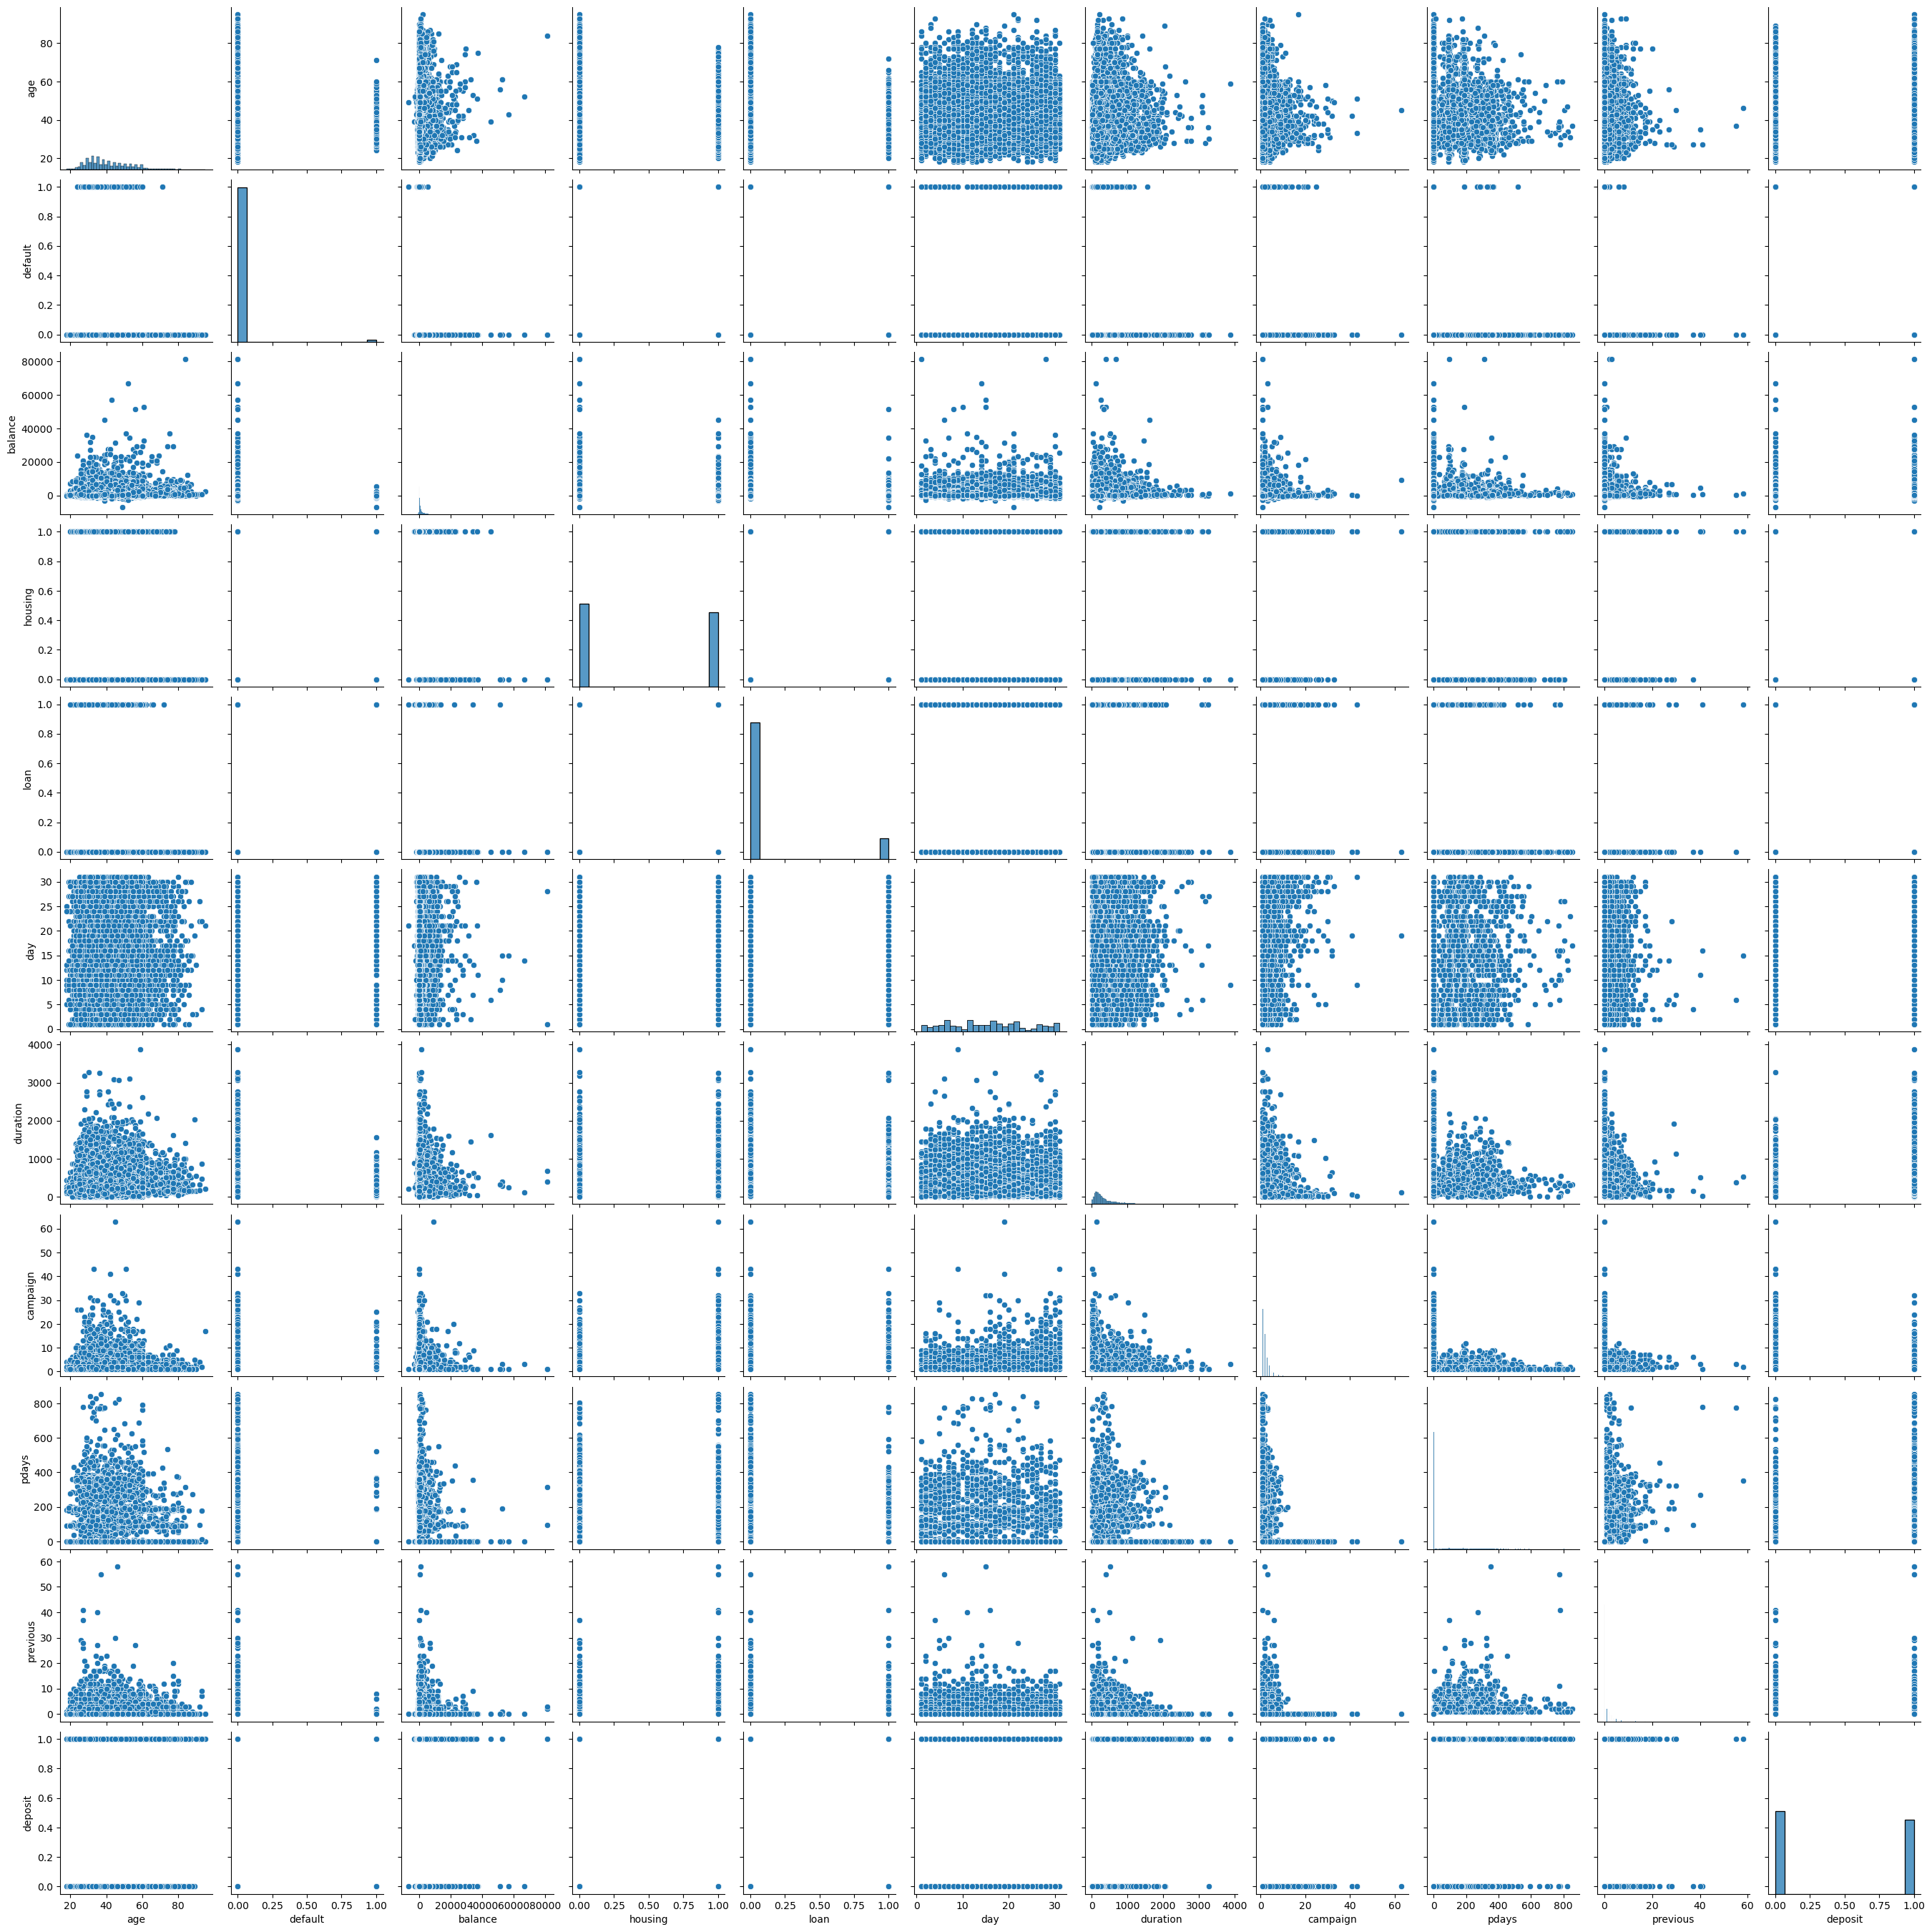

In [7]:
sns.pairplot(data,palette="hls")

In [8]:
import pandas as pd
df=pd.DataFrame({"default": ["yes","no","yes","no","yes","no","yes","no","yes","no","yes","no"]})
data_dummies = pd.get_dummies(df, columns=['default'])
df["default"]=data_dummies["default_yes"].astype(int)
df

,default
0,1
1,0
2,1
3,0
4,1
5,0
6,1
7,0
8,1
9,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  int64 
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  int64 
 7   loan       11162 non-null  int64 
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 1.4+ MB


In [10]:
data.duplicated().any()

False

In [11]:
data.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,0.015051,1528.538524,0.473123,0.130801,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,11.913369,0.121761,3225.413326,0.499299,0.337198,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,18.000000,0.000000,-6847.000000,0.000000,0.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,122.000000,0.000000,0.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,550.000000,0.000000,0.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1708.000000,1.000000,0.000000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,95.000000,1.000000,81204.000000,1.000000,1.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


In [12]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [13]:
value = data['marital'].value_counts()
value_percentages = data['marital'].value_counts(normalize=True) * 100
summary_df = pd.DataFrame({
    'Count': value,
    'Percentage': value_percentages
})
summary_df.head()

,Count,Percentage
marital,,
married,6351,56.898405
single,3518,31.517649
divorced,1293,11.583946


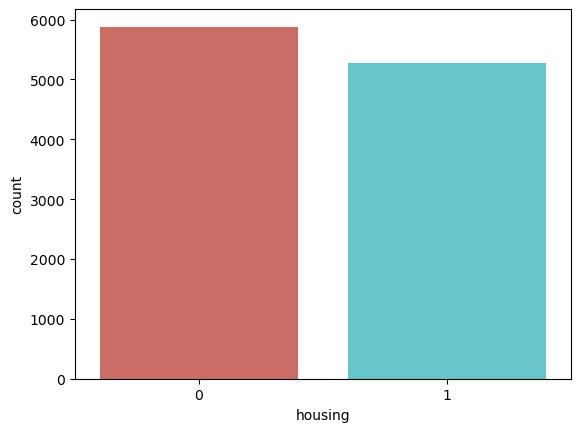

<Figure size 640x480 with 0 Axes>

In [14]:
sns.countplot(x="housing",data=data,palette="hls")
plt.show()
plt.savefig("count_plot")#this command is used to save an figure

<AxesSubplot:xlabel='housing', ylabel='deposit'>

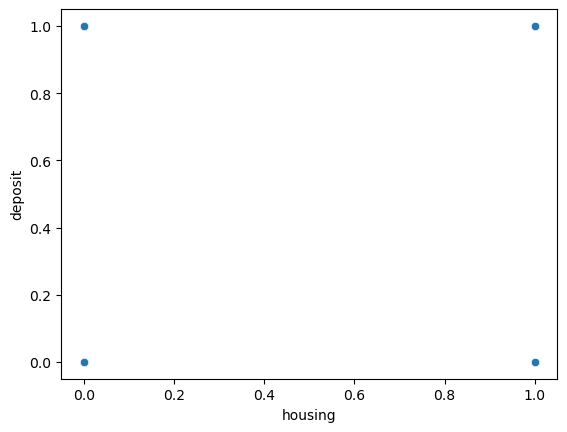

In [15]:
sns.scatterplot(x="housing",y="deposit",data=data)

<AxesSubplot:xlabel='balance', ylabel='deposit'>

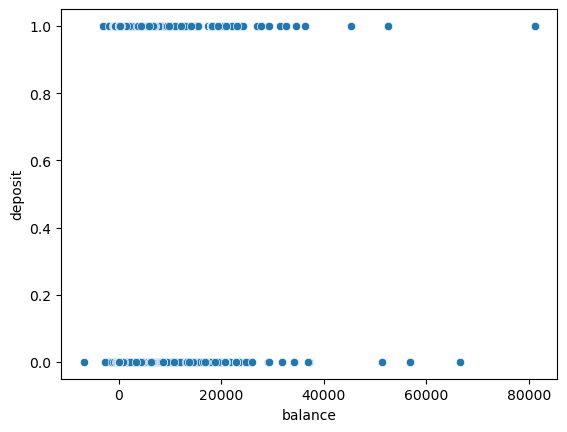

In [16]:
sns.scatterplot(x="balance",y="deposit",data=data)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.model_selection import train_test_split

In [21]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [22]:
columns=list(data.columns)
for x in columns:
    print(data[x].unique())

[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
['married' 'single' 'divorced']
['secondary' 'tertiary' 'primary' 'unknown']
[0 1]
[2343   45 1270 ... 1594 2593 -134]
[1 0]
[0 1]
['unknown' 'cellular' 'telephone']
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
[1042 1467 1389 ... 1504  818 1812]
[ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 41 63 27 30 26 23 28 33 31]
[ -1 166  91 147 170 150 171 126 182 110 198 174 175  27 128 100 177 167
 122 183 195 133 178  34  10 163 184 154  99  93   2 242 272 

In [23]:
contact_unknwon=data[data["contact"]=="unknown"].shape[0]

In [24]:
percentage=(contact_unknwon/data.shape[0])*100
print(percentage)

21.017738756495252


In [25]:
data=data[data["contact"]!="unknown"]
data=data[data["education"]!="unknown"]
data=data[data["poutcome"]!="unknown"]
data=data[data["job"]!="unknown"]

In [26]:
data.duplicated().sum()

0

In [27]:
data["contact"].unique()

array(['telephone', 'cellular'], dtype=object)

In [28]:
for x in columns:
    print(data[x].unique())

[42 33 53 37 45 34 46 43 38 40 32 30 31 50 47 59 44 54 28 41 26 39 60 55
 36 48 52 35 29 23 58 49 27 51 57 56 25 24 22 83 61 72 76 62 20 79 70 75
 77 65 68 82 73 69 66 80 67 71 21 81 18 64 84 63 74 19 78 86 88]
['admin.' 'services' 'retired' 'technician' 'entrepreneur' 'management'
 'unemployed' 'blue-collar' 'self-employed' 'student' 'housemaid']
['single' 'married' 'divorced']
['secondary' 'tertiary' 'primary']
[0 1]
[-247 3444 2269 ...  971 1594 -134]
[1 0]
[1 0]
['telephone' 'cellular']
[21 17 18 19 20 30  2  3  4  5  6  9 10 12 13 16 27  8 14 15 22 23 24 29
  7 11 25 26  1 28 31]
['oct' 'nov' 'jan' 'feb' 'mar' 'apr' 'may' 'jun' 'jul' 'aug' 'sep' 'dec']
[ 519  144 1091 1210  652  596  716 1015  424  522  623  639  276  755
  994  531 1258  888  370  500 1341  615  591  530  957  796  316  902
  707  215  699  751  289  261  152  182  546 1579  572 1164  642  810
 1916  158  787  126   97  154  118  127  195  233  308  112  207  350
  406  232   95  243  296 1203  583 1353  952 1032

In [29]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
890,42,admin.,single,secondary,0,-247,1,1,telephone,21,oct,519,1,166,1,other,1
891,33,services,married,secondary,0,3444,1,0,telephone,21,oct,144,1,91,4,failure,1
951,53,retired,married,tertiary,0,2269,0,0,cellular,17,nov,1091,2,150,1,success,1
952,37,technician,married,secondary,0,5115,1,0,cellular,17,nov,1210,2,171,4,failure,1
953,45,entrepreneur,married,secondary,0,781,0,1,cellular,17,nov,652,2,126,2,failure,1


In [30]:
data["marital"].replace({"married":1,"single":2,"divorced":3},inplace=True)

In [31]:
data["marital"].unique()

array([2, 1, 3], dtype=int64)

In [32]:
data=data[data["poutcome"]!="other"]
data["poutcome"].replace({"success":1,"failure":0},inplace=True)

In [33]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
891,33,services,1,secondary,0,3444,1,0,telephone,21,oct,144,1,91,4,0,1
951,53,retired,1,tertiary,0,2269,0,0,cellular,17,nov,1091,2,150,1,1,1
952,37,technician,1,secondary,0,5115,1,0,cellular,17,nov,1210,2,171,4,0,1
953,45,entrepreneur,1,secondary,0,781,0,1,cellular,17,nov,652,2,126,2,0,1
985,46,unemployed,3,secondary,0,3354,1,0,cellular,19,nov,522,1,174,1,1,1


## Sumarry on when to use MEAN ,MEDIAN AND MOD(as a replacement of missing values)
-  Mean: Use for continuous, numeric data that is not heavily skewed and without significant outliers.
-  Median: Use for continuous, numeric data that is skewed or contains outliers.
-  Mode: Use for categorical data or discrete numeric data where you want to preserve the most frequent value.

In [34]:
x=data[["loan","housing","balance","age","duration","campaign","default","marital","poutcome"]]
y=data["deposit"]

In [35]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)
lr=LogisticRegression()
model=lr.fit(X_train,y_train)
y_pred=model.predict(X_test)
confusion_matrix(y_test,y_pred)
df=pd.DataFrame({
    "Accuracy Score":[accuracy_score(y_test,y_pred)],
    "precission Score":[precision_score(y_test,y_pred)]
})
df.index+=1
df.head()
#model.classes_

,Accuracy Score,precission Score
1,0.832565,0.871795


In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       194
           1       0.87      0.89      0.88       457

    accuracy                           0.83       651
   macro avg       0.80      0.79      0.80       651
weighted avg       0.83      0.83      0.83       651

